In [3]:
#Import dependancy 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from config import weather_api_key
from scipy.stats import linregress
from citipy import citipy

In [4]:
#Generate Cities List
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

611

In [7]:
# Perform API Calls

#Perform a weather check on each city using a series of successive API calls.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#Include a print log of each city as it'sbeing processed (with the city number and city name).
# initialising lists to hold reponse info     
cloudiness = [] 
country = []     
date = []         
humidity = []     
lat = []       
lng = []         
max_temp = []     
wind_speed = []  
city_list = []

print('Beginning Data Retrieval')
print('---------------------')
counter = 1
nb_tries = 10
# Loop through the list of cities and perform a request for data on each
for city in cities:
    city_url = query_url + city.replace(' ','+') 
    response = requests.get(city_url)
    print(f'Processing Record {counter} | {city}')
    
    try:
        response.raise_for_status()
        data = response.json()
        #print(data) # to check the key structure
        time.sleep(1)
        city_list.append(city)
        cloudiness.append(data['clouds']['all'])
        country.append(data['sys']['country'])      
        date.append(data['dt'])
        humidity.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])    
        wind_speed.append(data['wind']['speed'])
    except requests.exceptions.HTTPError as e:
        print('City not found. skipping...')
    except ConnectionError as err:
        if nb_tries == 0:
            raise err
        else:
            time.sleep(1)
    counter +=1
    nb_tries -= 1
print('---------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
---------------------
Processing Record 1 | beaverlodge
Processing Record 2 | butaritari
Processing Record 3 | tasiilaq
Processing Record 4 | cidreira
Processing Record 5 | jishu
Processing Record 6 | avera
Processing Record 7 | carmen del parana
Processing Record 8 | meulaboh
Processing Record 9 | qaanaaq
Processing Record 10 | mataura
Processing Record 11 | santa isabel do rio negro
Processing Record 12 | puerto ayora
Processing Record 13 | aswan
Processing Record 14 | caluquembe
Processing Record 15 | hervey bay
Processing Record 16 | gasa
Processing Record 17 | vaini
Processing Record 18 | kirovskiy
Processing Record 19 | hobart
Processing Record 20 | angoram
Processing Record 21 | jamestown
Processing Record 22 | necochea
Processing Record 23 | comodoro rivadavia
Processing Record 24 | orapa
Processing Record 25 | bredasdorp
Processing Record 26 | busselton
Processing Record 27 | mount gambier
Processing Record 28 | mabopane
Processing Record 29 | bereda
P

Processing Record 232 | caravelas
Processing Record 233 | maracas
Processing Record 234 | san carlos
Processing Record 235 | port hedland
Processing Record 236 | port moresby
Processing Record 237 | victoria falls
Processing Record 238 | attawapiskat
City not found. skipping...
Processing Record 239 | christchurch
Processing Record 240 | clyde river
Processing Record 241 | finschhafen
Processing Record 242 | porto novo
Processing Record 243 | bulawayo
Processing Record 244 | ozernovskiy
Processing Record 245 | zhigansk
Processing Record 246 | seoul
Processing Record 247 | gornopravdinsk
Processing Record 248 | bay city
Processing Record 249 | namibe
Processing Record 250 | lagos
Processing Record 251 | meyungs
City not found. skipping...
Processing Record 252 | moroni
Processing Record 253 | akdepe
Processing Record 254 | provideniya
Processing Record 255 | winnemucca
Processing Record 256 | lugovoy
Processing Record 257 | kaitangata
Processing Record 258 | constitucion
Processing Reco

Processing Record 460 | bose
Processing Record 461 | pacific grove
Processing Record 462 | tunduru
City not found. skipping...
Processing Record 463 | innisfail
Processing Record 464 | nuuk
Processing Record 465 | jiangyou
Processing Record 466 | cap malheureux
Processing Record 467 | aksarka
Processing Record 468 | champerico
Processing Record 469 | jasper
Processing Record 470 | hambantota
Processing Record 471 | santa maria
Processing Record 472 | asilah
Processing Record 473 | ziro
Processing Record 474 | ambon
Processing Record 475 | santander
Processing Record 476 | ruatoria
City not found. skipping...
Processing Record 477 | nitra
Processing Record 478 | telimele
Processing Record 479 | san juan de la maguana
Processing Record 480 | terrace bay
Processing Record 481 | berdigestyakh
Processing Record 482 | charters towers
Processing Record 483 | ancud
Processing Record 484 | miraflores
Processing Record 485 | truro
Processing Record 486 | itanhem
Processing Record 487 | fukue
Pro

In [8]:
# Convert Raw Data to DataFrame
weather_data_df = pd.DataFrame({
     'City':city_list,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temperature':max_temp,
     'Wind Speed':wind_speed,
     })
 
# Create a data frame from dictionary
weather_data = pd.DataFrame(weather_data_df)

# Display count of weather data values 
weather_data.count()

# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,beaverlodge,75,CA,1619922195,81,55.2166,-119.4361,6.00,8.23
1,butaritari,100,KI,1619922196,73,3.0707,172.7902,28.50,4.55
2,tasiilaq,9,GL,1619922197,86,65.6145,-37.6368,-3.00,1.76
3,cidreira,0,BR,1619922198,83,-30.1811,-50.2056,20.27,6.87
4,jishu,4,CN,1619922200,44,44.3167,126.8000,14.68,3.04


In [9]:
# Statistics Analytics 
weather_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
count,553.000000,5.530000e+02,553.000000,553.000000,553.000000,553.000000,553.000000
mean,52.775769,1.619923e+09,70.104882,19.325039,17.043770,16.475732,3.515316
std,39.479223,2.107937e+02,21.059866,33.873752,90.763254,10.367273,2.529845
min,0.000000,1.619922e+09,5.000000,-54.800000,-179.166700,-13.000000,0.100000
25%,14.000000,1.619922e+09,58.000000,-8.897800,-59.133200,9.000000,1.630000
50%,52.000000,1.619923e+09,74.000000,22.678300,20.134700,18.540000,3.000000
75%,95.000000,1.619923e+09,86.000000,48.166700,96.128500,25.000000,4.630000
max,100.000000,1.619923e+09,100.000000,78.218600,179.316700,34.650000,18.520000


In [68]:
#Todays date
today_date = pd.to_datetime('today').date().strftime('%m/%d/%y')

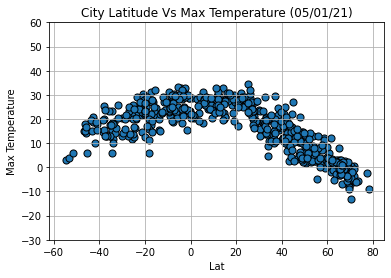

In [69]:
#scatter plot for lat vs max temp 
weather_data.plot.scatter(x="Lat", y="Max Temperature", xlim = (-62, 85), ylim= (-30, 60), s= 50, grid = True, edgecolor = "black", figsize=(6,4), title= f"City Latitude Vs Max Temperature ({today_date})")
plt.savefig("LatitudeVsMaxTemp.png")
plt.show()

In [ ]:
#This scatter plot shows that as you get closer to a latitude of 0 degrees 
#then the max temperatur rises and as you get further away from the the equator then the tempurature decreases.

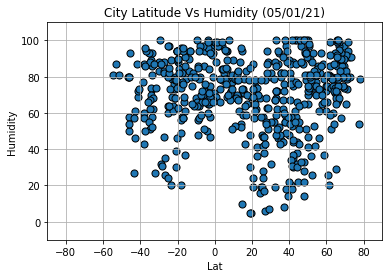

In [70]:
weather_data.plot.scatter(x="Lat", y="Humidity", xlim = (-90, 90), ylim= (-10, 110), s= 50, grid = True, edgecolor = "black", figsize=(6,4), title = f"City Latitude Vs Humidity ({today_date})")
plt.savefig("Humidity.png")
plt.show()

In [ ]:
#This scatter plot shows that a higher humidity percentage is closer to the equator but it varies from north to south. 

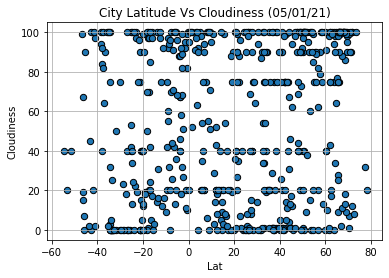

In [13]:
weather_data.plot.scatter(x="Lat", y="Cloudiness", xlim = (-62, 85), ylim= (-5, 105),s= 40, figsize=(6,4), edgecolor = "black", grid = True, title = f"City Latitude Vs Cloudiness ({today_date})")
plt.savefig("Cloudiness.png")
plt.show()

In [ ]:
# This scatter plot shows that cloudiness varies and there is not correlation between latitude and cloudiness.

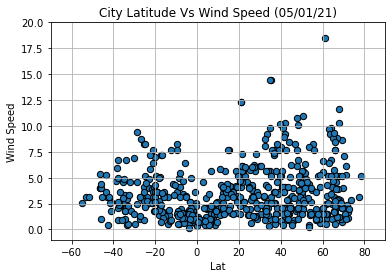

In [14]:
weather_data.plot.scatter(x="Lat", y="Wind Speed", xlim = (-70, 90), ylim= (-1, 20), s= 40, figsize=(6,4), edgecolor = "black", grid = True, title = f"City Latitude Vs Wind Speed ({today_date})")
plt.savefig("LatitudeVsWindspeed.png")
plt.show()

In [ ]:
#This scatter plot shows that wind speed and latitude have no correlation. 

In [15]:
north_hemi_df = weather_data.loc[(weather_data['Lat']>0)]
south_hemi_df = weather_data.loc[(weather_data['Lat'] < 0)]

In [63]:
#define the function to call for each analysis/parameter
def line_regr(x, y,yaxis):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    y_pred = intercept + slope*x
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x,y)
    plt.plot(x,y_pred,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.annotate(line_eq ,(-20,20),fontsize=15,color="red")
    plt.annotate(line_eq ,(-30,4),fontsize=15,color="red")
    print(f"r-squared: {rvalue}")
    plt.show() 

r-squared: -0.9015771322557785


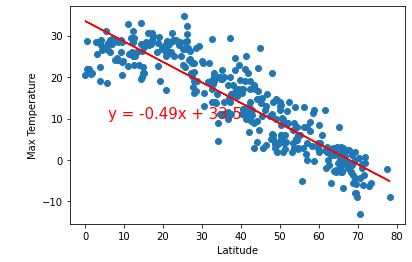

<Figure size 432x288 with 0 Axes>

In [53]:
#Northern Hemisphere - Temperature (C) vs. Latitude
x = north_hemi_df['Lat']
y = north_hemi_df['Max Temperature']
line_regr(x,y,'Max Temperature')

plt.savefig("NH_temp_vs_lat.png")

r-squared: 0.6715475677878255


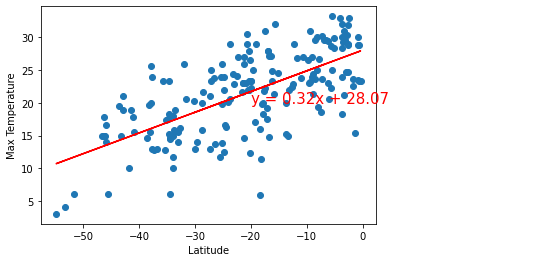

<Figure size 432x288 with 0 Axes>

In [54]:
#Southern Hemisphere - Temperature (C) vs. Latitude
x = south_hemi_df['Lat']
y = south_hemi_df['Max Temperature']
line_regr(x,y,'Max Temperature')

plt.savefig("SH_temp_vs_lat.png")

In [ ]:
# This set of graphs shows that starting at the equator and going away either towards the north pole or the south pole the max 
# temp decreases. On the northern hemisphere plot, the lin-regres has a negative slop because it starts at the equator 
# and moves away, where as the souther hemisphere plot starts at the south pole and moves towards the equator and has a 
# positive slope. 

r-squared: 0.11597715342667607


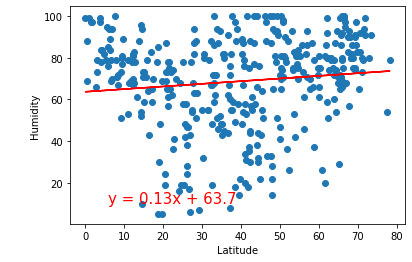

<Figure size 432x288 with 0 Axes>

In [55]:
#Northern Hemisphere - Humidity (%) vs. Latitude 
x = north_hemi_df['Lat']
y = north_hemi_df['Humidity']
line_regr(x,y,'Humidity')

plt.savefig("NH_hum_vs_lat.png")

r-squared: 0.13088799799058898


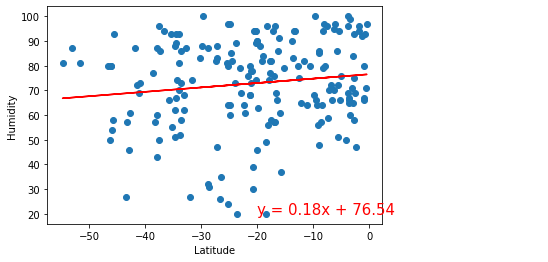

<Figure size 432x288 with 0 Axes>

In [56]:
#Southern Hemisphere - Humidity (%) vs. Latitude 
x = south_hemi_df['Lat']
y = south_hemi_df['Humidity']
line_regr(x,y,'Humidity')

plt.savefig("SH_hum_vs_lat.png")

In [ ]:
# This set of plots show that in the southern hemisphere and the northern hemisphere both the slop are positive and 
# that there is no correlation with humidity and latitude. 

r-squared: 0.1862651499553145


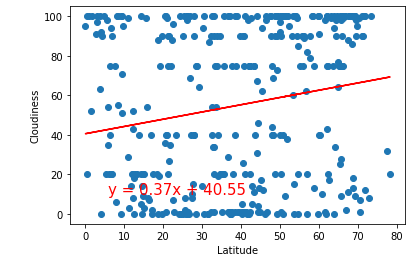

<Figure size 432x288 with 0 Axes>

In [57]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude 
x = north_hemi_df['Lat']
y = north_hemi_df['Cloudiness']
line_regr(x,y,'Cloudiness')

plt.savefig("NH_cloud_vs_lat.png")

r-squared: 0.19071514231816142


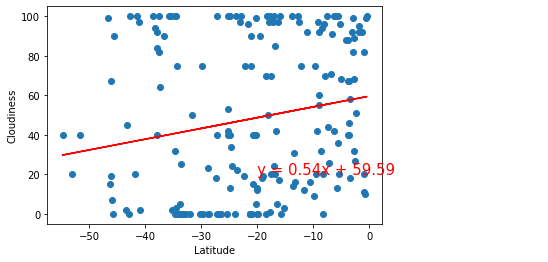

<Figure size 432x288 with 0 Axes>

In [58]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
x = south_hemi_df['Lat']
y = south_hemi_df['Cloudiness']
line_regr(x,y,'Cloudiness')

plt.savefig("SH_cloud_vs_lat.png")

In [ ]:
#This set of plots show there is no correlation of cloud coverage to latitude from southern hemisphere to notrthern hemisphere
# however there is more cloud coverage on the northern hemisphere compared to the southern hemisphere. 

r-squared: 0.13462497178060345


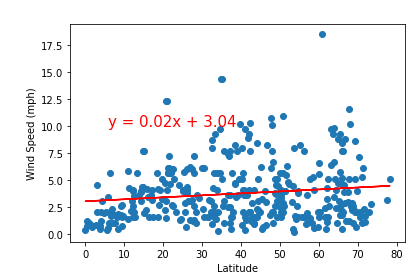

<Figure size 432x288 with 0 Axes>

In [59]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x = north_hemi_df['Lat']
y = north_hemi_df['Wind Speed']
line_regr(x,y,'Wind Speed (mph)')

plt.savefig("NH_wind_vs_lat.png")

r-squared: -0.19480025621626545


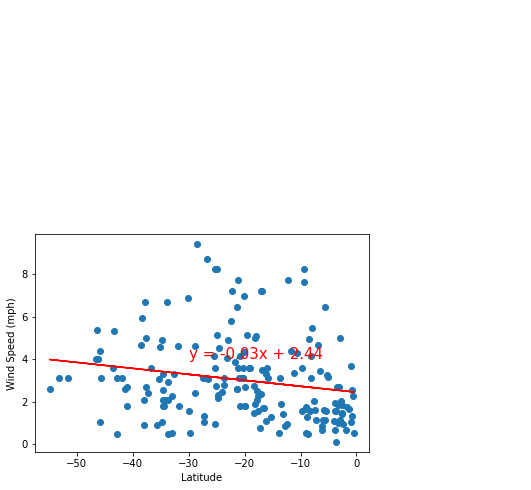

<Figure size 432x288 with 0 Axes>

In [64]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
x = south_hemi_df['Lat']
y = south_hemi_df['Wind Speed']
line_regr(x,y,'Wind Speed (mph)')

plt.savefig("SH_wind_vs_lat.png")

In [ ]:
# The scatter plots show that towards the equator ther wide speed is lower but there is no difference in wind speed
# from the southern and northern hemisphere. 
